In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from utils.constant import *

dataset = pd.read_parquet(DIR_CLEANED + "merged_dataset1726175551.parquet")
df_italy = dataset[dataset['Territory'] == 'Italia']

X = df_italy[['Year', 'Sex']]  # Use Year and Sex as input (you can add more features)
y = df_italy.filter(regex=r'^Age_\d+_\d+$')  # Select all age group columns as output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    'Support Vector Regression': MultiOutputRegressor(SVR(kernel='rbf')),
    'Neural Network': MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)),
    'K-Nearest Neighbors': MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5)),
    'Elastic Net': MultiOutputRegressor(ElasticNet(alpha=0.1, l1_ratio=0.5))
}

# Train each model and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
    mse_mean = mean_squared_error(y_test, y_pred)
    
    print(f'{name} Model - Mean Squared Error per output: {mse}')
    print(f'{name} Model - Overall Mean Squared Error: {mse_mean}\n')

Random Forest Model - Mean Squared Error per output: [4.20632376e+11 6.79405010e+11 7.77882260e+11 1.04418863e+12
 2.00566624e+12 2.02956581e+12 1.17274045e+12 7.55639663e+11
 2.87114399e+11 1.50584824e+10 9.96867247e+06]
Random Forest Model - Overall Mean Squared Error: 835263935869.144

Gradient Boosting Model - Mean Squared Error per output: [4.29588006e+11 6.98114615e+11 8.03596472e+11 1.07981462e+12
 2.08175927e+12 2.12190024e+12 1.22861084e+12 7.77094965e+11
 2.97147796e+11 1.78255724e+10 1.17098852e+07]
Gradient Boosting Model - Overall Mean Squared Error: 866860372687.1418

Support Vector Regression Model - Mean Squared Error per output: [2.19017846e+12 2.31448145e+12 1.45814157e+12 1.72081089e+12
 3.43480976e+12 5.49578239e+12 3.84439511e+12 3.55440460e+12
 2.10120379e+12 1.45398113e+11 1.39129652e+08]
Support Vector Regression Model - Overall Mean Squared Error: 2387249570338.4253

Neural Network Model - Mean Squared Error per output: [2.28313501e+12 2.29277498e+12 1.47612678

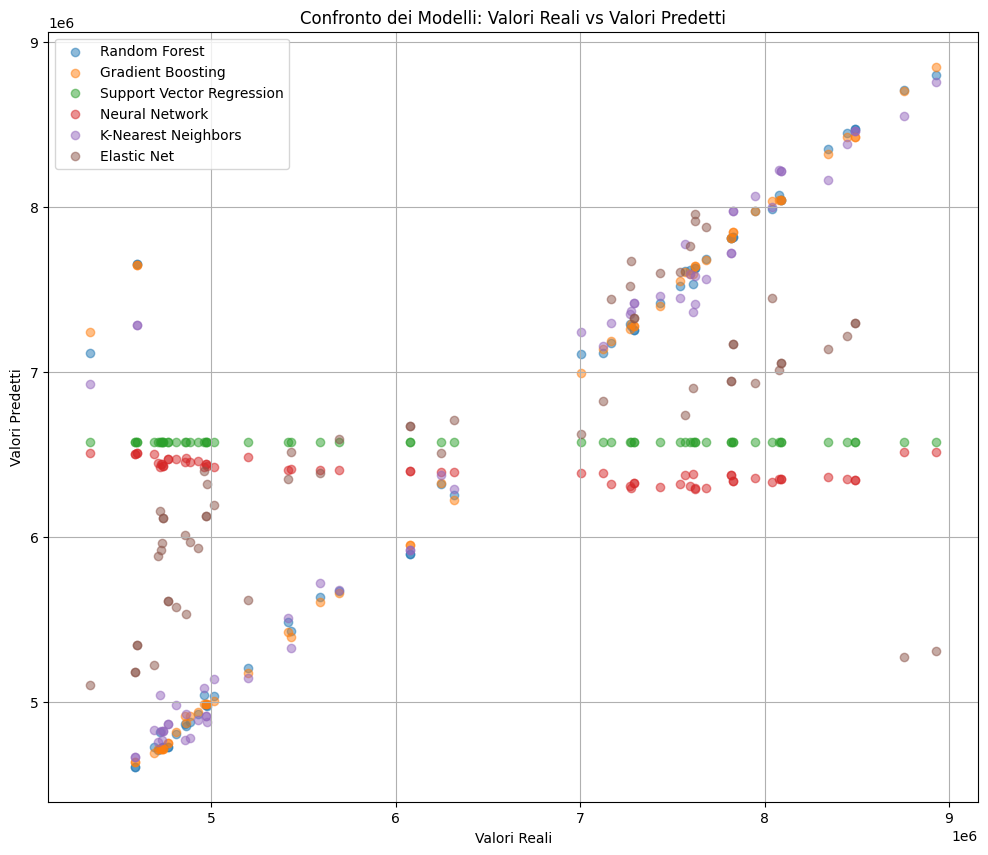

In [2]:
import matplotlib.pyplot as plt

# Scegli un'età per visualizzare (ad esempio, la prima colonna dell'output)
age_column = y.columns[0]

# Plot per ogni modello
plt.figure(figsize=(12, 10))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Consideriamo solo il primo output
    y_true = y_test[age_column]
    y_pred_first = y_pred[:, 0]  # Cambia l'indice se vuoi un altro output
    
    plt.scatter(y_true, y_pred_first, label=name, alpha=0.5)

# Imposta etichette e titolo
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto dei Modelli: Valori Reali vs Valori Predetti')
plt.legend()
plt.grid(True)
plt.show()